# SO SANH MODEL KHI DU LIEU CHUA CAN BANG VA DU LIEU DA CAN BANG, PHUONG PHAP CAN BANG DU LIEU

In [3]:
# load thu vien
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Cài đặt
%pip install xgboost
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# load file
customer = pd.read_csv('D:\ThucTap\customerChurn.csv')

In [5]:
# xoa nan
customer=customer.dropna().reset_index(drop=True)
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

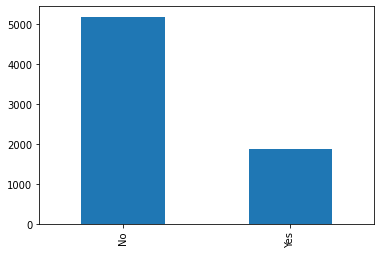

In [6]:
# Xem do lech
customer['Churn'].value_counts().plot(kind="bar")

In [7]:
# ------ Train binh thuong
# Xoa cac cot khong can thiet
customer = customer.drop(["customerID", "gender", "MonthlyCharges"], axis = 1)

In [8]:
# Chuyen chu thanh so
customer["TotalCharges"] = pd.to_numeric(customer["TotalCharges"],errors='coerce')

# Chuyen cot churn yes - no thanh 0 - 1
customer['Churn'] = customer['Churn'].map(dict(Yes=1, No=0))

In [9]:
# Tao one hot
# Chuyen gia tri chu thanh cot rieng
customer_dummy=pd.get_dummies(customer,drop_first=True)
customer_dummy = customer_dummy.dropna()

# Scaler du lieu
scaler = MinMaxScaler()
scaler.fit(customer[["TotalCharges", "tenure"]])
customer_dummy[["TotalCharges", "tenure"]] = scaler.transform(customer_dummy[["TotalCharges", "tenure"]])

In [10]:
# Tao ham in ket qua du doan
def print_scores(y_true,y_pred):
  print(classification_report(y_true,y_pred))

# Su dung tap du lieu ban dau ( mat can bang )

In [11]:
# Tao tap X dau vao khong co bien churn va tap Y dau ra chi co bien Churn
X=customer_dummy.drop(["Churn"],axis=1)
y=customer_dummy['Churn']

# Chia du lieu thanh tap train, test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [12]:
# ------------Train model voi imbalance data
# LogisticRegression
# Khoi tao
model = LogisticRegression()

# Fit voi du lieu train
model.fit(X_train,y_train)

# Du doan du lieu test
y_pred=model.predict(X_test)

# in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [13]:
# Class_weight: thay doi trong so, tang cho label it va giam cho label nhieu
# Khoi tao
model = LogisticRegression(class_weight='balanced')

#Fit voi du lieu train
model.fit(X_train,y_train)

#Du doan du lieu test
y_pred=model.predict(X_test)

#in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



In [14]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators = 200,random_state=42)
model_RFC.fit(X_train,y_train)
y_pred=model_RFC.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [15]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.01,random_state=42,n_estimators=200)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [16]:
# Xgboss

import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=42,n_estimators=200)
model_xgb.fit(X_train,y_train)

y_pred = model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.68      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



# Train model bang tap du lieu da dieu chinh can bang
## Dieu chinh can bang bang tay

### Giam so luong cua label nhieu hon: phuong phap unsample

In [17]:
# ------------- Train model Train model voi balance data
# Xu ly inbalance bang tay
# Lay ngau nhien tap du lieu lon hon = tap du lieu nho hon
# Chia data churn =0 va churn = 1
data_0 = customer_dummy[customer_dummy.Churn == 0]
data_1 = customer_dummy[customer_dummy.Churn == 1]
data_0.shape, data_1.shape

((5163, 29), (1869, 29))

In [18]:
# Lay ngau nhien data_0 co so luong bang data_1
data_rus = data_0.sample(data_1.shape[0])
data_rus.shape

(1869, 29)

In [19]:
# Tong hop data
data_random_under = pd.concat([data_1, data_rus])
data_random_under.shape

(3738, 29)

In [20]:
# Tao tap X dau vao khong co bien churn va tap Y dau ra chi co bien Churn
X=data_random_under.drop(["Churn"],axis=1)
y=data_random_under['Churn']

# Chia du lieu thanh tap train, test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [21]:
# Train mo hinh voi data co duoc
# LogisticRegression

# Khoi tao
model = LogisticRegression()

#Fit voi du lieu train
model.fit(X_train,y_train)

#Du doan du lieu test
y_pred=model.predict(X_test)

#in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       369
           1       0.74      0.80      0.77       379

    accuracy                           0.76       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.76      0.75       748



# Train model voi tap du lieu da duoc can bang
# Dieu chinh tap du lieu bang ham

### Thuc hien under sampling can bang bang phuong phap NearMiss: loai bo cac diem du lieu o xa

In [22]:
# Tao tap X dau vao khong co bien churn va tap Y dau ra chi co bien Churn
X=customer_dummy.drop(["Churn"],axis=1)
y=customer_dummy['Churn']

# Tao du lieu can bang
# resample du lieu bang phuong phap NearMiss dung ham
from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_res, y_res = nm.fit_resample(X, y)

# Chia du lieu thanh tap train, test
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size = 0.2,random_state=42)

X_res.shape, y_res.shape

((3738, 28), (3738,))

In [23]:
# LogisticRegression
#Khoi tao
model = LogisticRegression()

#Fit voi du lieu train
model.fit(X_train,y_train)

#Du doan du lieu test
y_pred=model.predict(X_test)

#in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.73      0.58      0.64       379
           1       0.64      0.78      0.70       369

    accuracy                           0.68       748
   macro avg       0.69      0.68      0.67       748
weighted avg       0.69      0.68      0.67       748



In [24]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators = 200,random_state=42)
model_RFC.fit(X_train,y_train)
y_pred=model_RFC.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       379
           1       0.65      0.72      0.68       369

    accuracy                           0.67       748
   macro avg       0.67      0.67      0.67       748
weighted avg       0.67      0.67      0.67       748



In [25]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.01,random_state=42,n_estimators=200)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       379
           1       0.65      0.72      0.68       369

    accuracy                           0.67       748
   macro avg       0.67      0.67      0.67       748
weighted avg       0.67      0.67      0.67       748



In [26]:
# Xgboss

import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=42,n_estimators=200)
model_xgb.fit(X_train,y_train)

y_pred = model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.48      0.61       379
           1       0.63      0.89      0.74       369

    accuracy                           0.68       748
   macro avg       0.72      0.69      0.67       748
weighted avg       0.73      0.68      0.67       748



# Train model voi tap du lieu da duoc can bang
# Dieu chinh tap du lieu bang ham

### Thuc hien over sampling can bang bang phuong phap Random: nhan doi cac diem du lieu san co

In [27]:
# Tao tap X dau vao khong co bien churn va tap Y dau ra chi co bien Churn
X=customer_dummy.drop(["Churn"],axis=1)
y=customer_dummy['Churn']

# Tao du lieu can bang
# resample du lieu bang phuong phap NearMiss dung ham
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)

# Chia du lieu thanh tap train, test
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size = 0.2,random_state=42)
X_ros.shape, y_ros.shape

((10326, 28), (10326,))

In [28]:
# LogisticRegression
#Khoi tao
model = LogisticRegression()

#Fit voi du lieu train
model.fit(X_train,y_train)

#Du doan du lieu test
y_pred=model.predict(X_test)

#in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1037
           1       0.75      0.79      0.77      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [29]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators = 200,random_state=42)
model_RFC.fit(X_train,y_train)
y_pred=model_RFC.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1037
           1       0.85      0.94      0.89      1029

    accuracy                           0.89      2066
   macro avg       0.89      0.89      0.89      2066
weighted avg       0.89      0.89      0.89      2066



In [30]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.01,random_state=42,n_estimators=200)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1037
           1       0.85      0.94      0.89      1029

    accuracy                           0.89      2066
   macro avg       0.89      0.89      0.89      2066
weighted avg       0.89      0.89      0.89      2066



In [31]:
# Xgboss

import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=42,n_estimators=200)
model_xgb.fit(X_train,y_train)

y_pred = model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1037
           1       0.74      0.80      0.77      1029

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



# Train model voi tap du lieu da duoc can bang
# Dieu chinh tap du lieu bang ham

### Thuc hien over sampling can bang bang phuong phap SMOTE: tao moi cac diem du lieu da co dua tren cac diem co san

In [32]:
# Tao tap dau vao, dau ra
X = customer_dummy.drop(['Churn'], axis= 1)
y = customer_dummy['Churn']

# Goi ham SMOTE sinh du lieu
from imblearn.over_sampling import SMOTE
sm = SMOTE()

# Tao tap du lieu moi can bang
X_ms, y_ms = sm.fit_resample(X, y)

# Chia tap train, test
X_train, X_test, y_train, y_test = train_test_split(X_ms,y_ms,test_size = 0.2,random_state=42)
X_ms.shape, y_ms.shape

((10326, 28), (10326,))

In [33]:
# LogisticRegression
#Khoi tao
model = LogisticRegression()

#Fit voi du lieu train
model.fit(X_train,y_train)

#Du doan du lieu test
y_pred=model.predict(X_test)

#in ra ket qua
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1037
           1       0.77      0.82      0.79      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [34]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators = 200,random_state=42)
model_RFC.fit(X_train,y_train)
y_pred=model_RFC.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1037
           1       0.81      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [35]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.01,random_state=42,n_estimators=200)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1037
           1       0.81      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [36]:
# Xgboss

import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=42,n_estimators=200)
model_xgb.fit(X_train,y_train)

y_pred = model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1037
           1       0.74      0.84      0.79      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [52]:
test = X_test
test['Churn'] = y_pred


In [56]:
test

,SeniorCitizen,tenure,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4139,4329,0.486111,0.295107,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
1692,4329,0.875000,0.541086,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2692,4329,0.986111,0.732351,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
7704,4329,0.026968,0.003307,1,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
321,4329,1.000000,0.489868,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,4329,1.000000,0.891749,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,0,0,0
4528,4329,0.013889,0.005833,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
8074,4329,0.118852,0.093723,1,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
4730,4329,0.069444,0.060362,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,0,1,1


In [58]:
test[test['SeniorCitizen'] == 4329]

,SeniorCitizen,tenure,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4139,4329,0.486111,0.295107,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
1692,4329,0.875000,0.541086,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2692,4329,0.986111,0.732351,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
7704,4329,0.026968,0.003307,1,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
321,4329,1.000000,0.489868,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,4329,1.000000,0.891749,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,0,0,0
4528,4329,0.013889,0.005833,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
8074,4329,0.118852,0.093723,1,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
4730,4329,0.069444,0.060362,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,0,1,1
